In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline


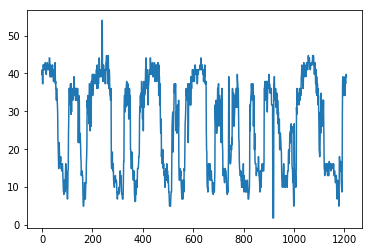

In [11]:
# load the dataset
##bb表表示风速
dataframe = pd.read_excel('speed.xlsx')
dataset = dataframe.iloc[:,1].values
# 将整型变为float
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()


In [12]:
dataset=dataset[:-1]
print(dataset.shape)

(1208,)


In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(7)


In [15]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = np.reshape(dataset,newshape=(-1,1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



In [16]:
# use this function to prepare the train and test datasets for modeling
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [18]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
print(testX.shape)

(1076, 1, 10)
(110, 1, 10)


In [19]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_acc',patience=5)


In [20]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(128, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=200,callbacks=[es],verbose=2)



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 2s - loss: 0.2864
Epoch 2/50
 - 0s - loss: 0.1395
Epoch 3/50
 - 0s - loss: 0.0520
Epoch 4/50
 - 0s - loss: 0.0178
Epoch 5/50
 - 0s - loss: 0.0190


D:\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 6/50
 - 0s - loss: 0.0231
Epoch 7/50
 - 0s - loss: 0.0189
Epoch 8/50
 - 0s - loss: 0.0151
Epoch 9/50
 - 0s - loss: 0.0147
Epoch 10/50
 - 0s - loss: 0.0150
Epoch 11/50
 - 0s - loss: 0.0145
Epoch 12/50
 - 0s - loss: 0.0139
Epoch 13/50
 - 0s - loss: 0.0137
Epoch 14/50
 - 0s - loss: 0.0136
Epoch 15/50
 - 0s - loss: 0.0133
Epoch 16/50
 - 0s - loss: 0.0131
Epoch 17/50
 - 0s - loss: 0.0128
Epoch 18/50
 - 0s - loss: 0.0126
Epoch 19/50
 - 0s - loss: 0.0124
Epoch 20/50
 - 0s - loss: 0.0122
Epoch 21/50
 - 0s - loss: 0.0120
Epoch 22/50
 - 0s - loss: 0.0118
Epoch 23/50
 - 0s - loss: 0.0116
Epoch 24/50
 - 0s - loss: 0.0114
Epoch 25/50
 - 0s - loss: 0.0112
Epoch 26/50
 - 0s - loss: 0.0110
Epoch 27/50
 - 0s - loss: 0.0108
Epoch 28/50
 - 0s - loss: 0.0106
Epoch 29/50
 - 0s - loss: 0.0104
Epoch 30/50
 - 0s - loss: 0.0102
Epoch 31/50
 - 0s - loss: 0.0100
Epoch 32/50
 - 0s - loss: 0.0098
Epoch 33/50
 - 0s - loss: 0.0096
Epoch 34/50
 - 0s - loss: 0.0094
Epoch 35/50
 - 0s - loss: 0.0093
Epoch 36/50
 -

In [21]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [22]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [23]:
#预测值的结果
testPredict[:,0]

array([33.35025  , 33.293396 , 32.327606 , 29.8597   , 26.001764 ,
       23.28733  , 21.037144 , 20.306051 , 21.07385  , 23.751888 ,
       23.428581 , 24.537834 , 28.065872 , 28.433094 , 29.634922 ,
       30.605844 , 30.875483 , 29.143393 , 28.375694 , 29.936102 ,
       29.83298  , 30.393581 , 28.556307 , 24.687876 , 21.142286 ,
       18.981152 , 17.031315 , 15.88217  , 14.753013 , 14.786992 ,
       15.122618 , 15.707798 , 15.8453245, 16.304693 , 15.878495 ,
       15.764956 , 15.478679 , 14.953277 , 14.595347 , 15.305295 ,
       15.157266 , 14.809414 , 14.396144 , 14.945747 , 15.881002 ,
       16.193108 , 16.372797 , 16.147123 , 16.3982   , 16.241741 ,
       16.130632 , 15.725203 , 15.673394 , 15.582688 , 16.023472 ,
       16.22117  , 16.064564 , 15.877552 , 15.858127 , 15.835292 ,
       15.802564 , 16.101175 , 15.912823 , 15.206304 , 14.747749 ,
       14.928937 , 14.621295 , 14.378812 , 13.53987  , 13.144647 ,
       13.028528 , 13.409358 , 13.627205 , 12.764195 , 11.6178

In [24]:
testY[0]

array([34.18000049, 31.06999759, 26.71999847, 19.87999922, 19.25999955,
       18.02000023, 19.25999955, 24.22999834, 29.82999826, 24.22999834,
       26.71999847, 34.7999986 , 27.95999779, 31.06999759, 32.93000125,
       31.06999759, 26.10000036, 27.95999779, 32.93000125, 29.82999826,
       32.93000125, 26.10000036, 18.02000023, 14.90999966, 14.90999966,
       13.05000067, 14.28999999, 14.28999999, 14.90999966, 16.15999968,
       16.15999968, 14.90999966, 16.15999968, 14.28999999, 14.28999999,
       14.28999999, 13.05000067, 13.05000067, 16.15999968, 14.28999999,
       13.05000067, 13.05000067, 14.90999966, 16.77999934, 16.15999968,
       16.15999968, 14.90999966, 16.15999968, 14.90999966, 14.90999966,
       14.28999999, 14.90999966, 14.90999966, 16.15999968, 16.15999968,
       14.90999966, 14.90999966, 14.90999966, 14.90999966, 14.90999966,
       16.15999968, 14.90999966, 13.05000067, 13.05000067, 14.28999999,
       13.05000067, 13.05000067, 11.1800002 , 11.1800002 , 11.81

In [25]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f MSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MSE' % (testScore))


Train Score: 4.42 MSE
Test Score: 4.51 MSE


<Figure size 720x432 with 0 Axes>

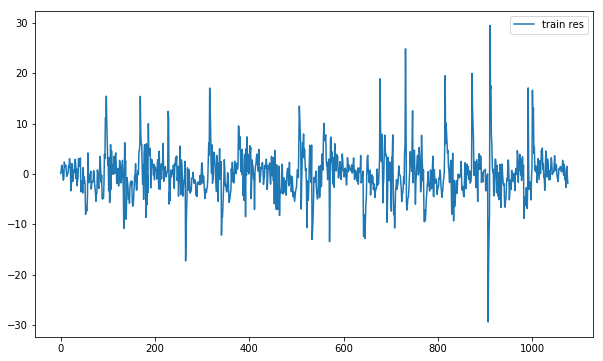

In [26]:
Res_train = []
for i,j in zip(trainY[0], trainPredict[:,0]):
    temp = i-j
    Res_train.append(temp)
Res_train = np.array(Res_train) 
plt.figure(figsize=(10,6))
plt.plot(Res_train,label='train res')
plt.legend(loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

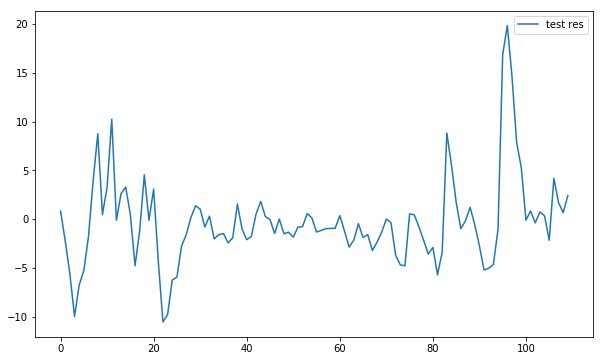

In [27]:
Res_test = []
for i,j in zip(testY[0], testPredict[:,0]):
    temp = i-j
    Res_test.append(temp)
Res_test = np.array(Res_test) 
plt.figure(figsize=(10,6))
plt.plot(Res_test,label='test res')
plt.legend(loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

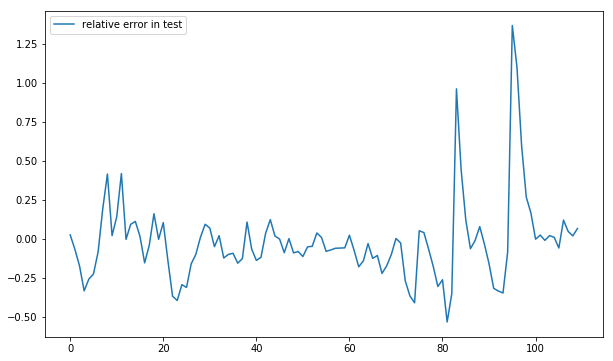

0.1637642567805823


In [36]:
relative_test = []
for i,j in zip(testY[0], testPredict[:,0]):
    temp = (i-j)/j
    relative_test.append(temp)
relative_test = np.array(relative_test) 
plt.figure(figsize=(10,6))
plt.plot(relative_test,label='relative error in test')
plt.legend(loc='best')
plt.show()
print(sum(abs(relative_test))/len(relative_test))

<Figure size 720x432 with 0 Axes>

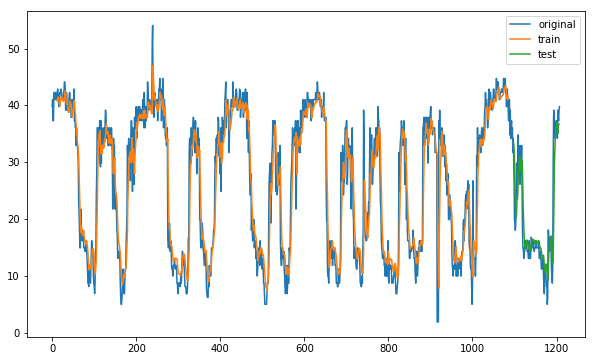

In [30]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset),label='original')
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.legend(loc='best')
plt.show()


In [31]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
print(testPredict.shape)

ss = np.reshape(dataset[-110:],newshape=(-1,1))
print(ss.shape)
mm = np.empty_like(dataset)
mm[:,:] = np.nan
mm[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = ss
print(mm.shape)


(110, 1)
(110, 1)
(1208, 1)


<Figure size 720x432 with 0 Axes>

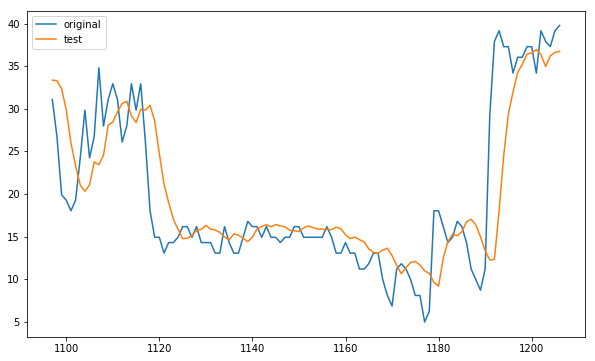

In [32]:
# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(mm),label='original')
plt.plot(testPredictPlot,label='test')
plt.legend(loc='best')
plt.show()

In [33]:
x = dataframe.iloc[:,0]
print(x)

0       4/11/2016 00:08:22
1       4/11/2016 00:16:22
2       4/11/2016 00:19:22
3       4/11/2016 00:22:23
4       4/11/2016 00:31:22
5       4/11/2016 00:33:23
6       4/11/2016 00:41:22
7       4/11/2016 00:51:23
8       4/11/2016 00:55:23
9       4/11/2016 01:00:23
10      4/11/2016 01:04:23
11      4/11/2016 01:10:23
12      4/11/2016 01:15:23
13      4/11/2016 01:21:22
14      4/11/2016 01:26:22
15      4/11/2016 01:31:22
16      4/11/2016 01:33:22
17      4/11/2016 01:39:23
18      4/11/2016 01:46:22
19      4/11/2016 01:47:22
20      4/11/2016 01:54:23
21      4/11/2016 02:01:23
22      4/11/2016 02:06:23
23      4/11/2016 02:10:22
24      4/11/2016 02:16:21
25      4/11/2016 02:20:23
26      4/11/2016 02:26:21
27      4/11/2016 02:30:23
28      4/11/2016 02:36:22
29      4/11/2016 02:39:22
               ...        
1179    4/17/2016 19:53:12
1180    4/17/2016 20:01:11
1181    4/17/2016 20:06:11
1182    4/17/2016 20:14:11
1183    4/17/2016 20:30:11
1184    4/17/2016 20:33:11
1